In [1]:
# Imports
import pandas as pd
import requests 
from bs4 import BeautifulSoup as bs
import numpy as np

In [3]:
# the url 
url = "https://nvd.nist.gov/vuln/search/results?form_type=Basic&results_type=overview&search_type=all&isCpeNameSearch=false&hyperlink_types=CISA+Known+Exploited+Vulnerabilities"
html = requests.get(url).content
soup = bs(html)

In [6]:
# a function to parse NaNs

def item_extract(item_cont, item_key):
    parse = item_cont.select(item_key)
    if parse == []:
        return np.nan
    else: 
        return parse[0].text


In [8]:
# the list of keys

vuln_key = "strong > a"
summary_key= "td > p"
published_key = "tr > td:nth-child(2) >span"
cvss_key = "td > span > a"

glossary = []
vuln_lst = []
summary_lst = []
published_lst = []
cvss_lst = []

for x in range(0,43):
    url = f"https://nvd.nist.gov/vuln/search/results?isCpeNameSearch=false&results_type=overview&hyperlink_types=CISA+Known+Exploited+Vulnerabilities&form_type=Basic&search_type=all&startIndex={x*20}"
    html = requests.get(url).content
    soup = bs(html)
    print(url)


    container = soup.select("tbody > tr")

    for i in container:
    
        #vuln
        vuln = item_extract(i, vuln_key)
        vuln_lst.append(vuln)
    
        #summary
        summary = item_extract(i, summary_key)
        summary_lst.append(summary)
    
        #published
        published = item_extract(i, published_key)
        published_lst.append(published)
    
        #CVSS
        cvss = item_extract(i, cvss_key)
        cvss_lst.append(cvss)
    
#print(vuln_lst)
#print(summary_lst)
#print(published_lst)
#print(cvss_lst)

pd.DataFrame({"vuln" : vuln_lst,
                    "summary":summary_lst,
                    "published": published_lst,
                    "cvss": cvss_lst})
         

https://nvd.nist.gov/vuln/search/results?isCpeNameSearch=false&results_type=overview&hyperlink_types=CISA+Known+Exploited+Vulnerabilities&form_type=Basic&search_type=all&startIndex=0
https://nvd.nist.gov/vuln/search/results?isCpeNameSearch=false&results_type=overview&hyperlink_types=CISA+Known+Exploited+Vulnerabilities&form_type=Basic&search_type=all&startIndex=20
https://nvd.nist.gov/vuln/search/results?isCpeNameSearch=false&results_type=overview&hyperlink_types=CISA+Known+Exploited+Vulnerabilities&form_type=Basic&search_type=all&startIndex=40
https://nvd.nist.gov/vuln/search/results?isCpeNameSearch=false&results_type=overview&hyperlink_types=CISA+Known+Exploited+Vulnerabilities&form_type=Basic&search_type=all&startIndex=60
https://nvd.nist.gov/vuln/search/results?isCpeNameSearch=false&results_type=overview&hyperlink_types=CISA+Known+Exploited+Vulnerabilities&form_type=Basic&search_type=all&startIndex=80
https://nvd.nist.gov/vuln/search/results?isCpeNameSearch=false&results_type=overv

,vuln,summary,published,cvss
0,CVE-2022-40684,An authentication bypass using an alternate pa...,"October 18, 2022; 10:15:09 AM -0400",9.8 CRITICAL
1,CVE-2022-41033,Windows COM+ Event System Service Elevation of...,"October 11, 2022; 3:15:20 PM -0400",7.8 HIGH
2,CVE-2022-41082,Microsoft Exchange Server Remote Code Executio...,"October 02, 2022; 9:15:08 PM -0400",8.8 HIGH
3,CVE-2022-41040,Microsoft Exchange Server Elevation of Privile...,"October 02, 2022; 9:15:08 PM -0400",8.8 HIGH
4,CVE-2022-3075,Insufficient data validation in Mojo in Google...,"September 26, 2022; 12:15:13 PM -0400",9.6 CRITICAL
...,...,...,...,...
839,CVE-2006-2492,Buffer overflow in Microsoft Word in Office 20...,"May 19, 2006; 8:02:00 PM -0400",7.6 HIGH
840,CVE-2006-1547,ActionForm in Apache Software Foundation (ASF)...,"March 30, 2006; 5:02:00 PM -0500",7.8 HIGH
841,CVE-2005-2773,HP OpenView Network Node Manager 6.2 through 7...,"September 02, 2005; 7:03:00 PM -0400",7.5 HIGH
842,CVE-2004-0210,The POSIX component of Microsoft Windows NT an...,"August 06, 2004; 12:00:00 AM -0400",7.2 HIGH


In [118]:
#renaming columns and saving the df as a new "df_col"
df = pd.DataFrame({"vuln" : vuln_lst,
                    "summary":summary_lst,
                    "published": published_lst,
                    "cvss": cvss_lst})
#df
df_col = df.rename(columns = {"vuln": "Vulnerabilities","published": "Vuln published","cvss": "Score"})
df_col

,Vulnerabilities,summary,Vuln published,Score
0,CVE-2022-40684,An authentication bypass using an alternate pa...,"October 18, 2022; 10:15:09 AM -0400",9.8 CRITICAL
1,CVE-2022-41033,Windows COM+ Event System Service Elevation of...,"October 11, 2022; 3:15:20 PM -0400",7.8 HIGH
2,CVE-2022-41082,Microsoft Exchange Server Remote Code Executio...,"October 02, 2022; 9:15:08 PM -0400",8.8 HIGH
3,CVE-2022-41040,Microsoft Exchange Server Elevation of Privile...,"October 02, 2022; 9:15:08 PM -0400",8.8 HIGH
4,CVE-2022-3075,Insufficient data validation in Mojo in Google...,"September 26, 2022; 12:15:13 PM -0400",9.6 CRITICAL
...,...,...,...,...
839,CVE-2006-2492,Buffer overflow in Microsoft Word in Office 20...,"May 19, 2006; 8:02:00 PM -0400",7.6 HIGH
840,CVE-2006-1547,ActionForm in Apache Software Foundation (ASF)...,"March 30, 2006; 5:02:00 PM -0500",7.8 HIGH
841,CVE-2005-2773,HP OpenView Network Node Manager 6.2 through 7...,"September 02, 2005; 7:03:00 PM -0400",7.5 HIGH
842,CVE-2004-0210,The POSIX component of Microsoft Windows NT an...,"August 06, 2004; 12:00:00 AM -0400",7.2 HIGH


In [11]:
# new column from score
df_col["Year"] = df_col.Vulnerabilities.str.split("-",expand = True)[1]
df_col

,Vulnerabilities,summary,Vuln published,Score,Year
0,CVE-2022-40684,An authentication bypass using an alternate pa...,"October 18, 2022; 10:15:09 AM -0400",9.8 CRITICAL,2022
1,CVE-2022-41033,Windows COM+ Event System Service Elevation of...,"October 11, 2022; 3:15:20 PM -0400",7.8 HIGH,2022
2,CVE-2022-41082,Microsoft Exchange Server Remote Code Executio...,"October 02, 2022; 9:15:08 PM -0400",8.8 HIGH,2022
3,CVE-2022-41040,Microsoft Exchange Server Elevation of Privile...,"October 02, 2022; 9:15:08 PM -0400",8.8 HIGH,2022
4,CVE-2022-3075,Insufficient data validation in Mojo in Google...,"September 26, 2022; 12:15:13 PM -0400",9.6 CRITICAL,2022
...,...,...,...,...,...
839,CVE-2006-2492,Buffer overflow in Microsoft Word in Office 20...,"May 19, 2006; 8:02:00 PM -0400",7.6 HIGH,2006
840,CVE-2006-1547,ActionForm in Apache Software Foundation (ASF)...,"March 30, 2006; 5:02:00 PM -0500",7.8 HIGH,2006
841,CVE-2005-2773,HP OpenView Network Node Manager 6.2 through 7...,"September 02, 2005; 7:03:00 PM -0400",7.5 HIGH,2005
842,CVE-2004-0210,The POSIX component of Microsoft Windows NT an...,"August 06, 2004; 12:00:00 AM -0400",7.2 HIGH,2004


In [22]:
# splitting the columnn
df_col["Score"] = df_col.Score.str.split(" ",expand = True)[0]
df_col


,Vulnerabilities,summary,Vuln published,Score,Year
0,CVE-2022-40684,An authentication bypass using an alternate pa...,"October 18, 2022; 10:15:09 AM -0400",9.8,2022
1,CVE-2022-41033,Windows COM+ Event System Service Elevation of...,"October 11, 2022; 3:15:20 PM -0400",7.8,2022
2,CVE-2022-41082,Microsoft Exchange Server Remote Code Executio...,"October 02, 2022; 9:15:08 PM -0400",8.8,2022
3,CVE-2022-41040,Microsoft Exchange Server Elevation of Privile...,"October 02, 2022; 9:15:08 PM -0400",8.8,2022
4,CVE-2022-3075,Insufficient data validation in Mojo in Google...,"September 26, 2022; 12:15:13 PM -0400",9.6,2022
...,...,...,...,...,...
839,CVE-2006-2492,Buffer overflow in Microsoft Word in Office 20...,"May 19, 2006; 8:02:00 PM -0400",7.6,2006
840,CVE-2006-1547,ActionForm in Apache Software Foundation (ASF)...,"March 30, 2006; 5:02:00 PM -0500",7.8,2006
841,CVE-2005-2773,HP OpenView Network Node Manager 6.2 through 7...,"September 02, 2005; 7:03:00 PM -0400",7.5,2005
842,CVE-2004-0210,The POSIX component of Microsoft Windows NT an...,"August 06, 2004; 12:00:00 AM -0400",7.2,2004


In [31]:
# sorting by columns
df_col.groupby(["Score","Year"]).mean()

C:\Users\Pedro\AppData\Local\Temp\ipykernel_8436\1381346703.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  df_col.groupby(["Score","Year"]).mean()


Empty DataFrame
Columns: []
Index: [(10.0, 2007), (10.0, 2009), (10.0, 2010), (10.0, 2011), (10.0, 2012), (10.0, 2013), (10.0, 2014), (10.0, 2015), (10.0, 2017), (10.0, 2019), (10.0, 2020), (10.0, 2021), (10.0, 2022), (3.1, 2016), (3.5, 2013), (4.3, 2009), (4.3, 2012), (4.3, 2013), (4.3, 2014), (4.3, 2015), (4.3, 2016), (4.3, 2017), (4.3, 2020), (4.7, 2017), (4.9, 2021), (5.0, 2010), (5.0, 2013), (5.0, 2015), (5.3, 2016), (5.3, 2021), (5.3, 2022), (5.4, 2018), (5.4, 2020), (5.5, 2016), (5.5, 2020), (5.5, 2021), (5.5, 2022), (5.9, 2017), (5.9, 2018), (5.9, 2022), (6.1, 2018), (6.1, 2019), (6.1, 2020), (6.1, 2021), (6.1, 2022), (6.3, 2016), (6.3, 2018), (6.4, 2012), (6.4, 2021), (6.5, 2016), (6.5, 2017), (6.5, 2018), (6.5, 2019), (6.5, 2020), (6.5, 2021), (6.5, 2022), (6.6, 2018), (6.8, 2010), (6.8, 2011), (6.8, 2013), (6.8, 2014), (6.8, 2021), (6.9, 2010), (6.9, 2013), (6.9, 2015), (7.0, 2017), (7.0, 2018), (7.0, 2019), (7.0, 2021), (7.0, 2022), (7.1, 2021), (7.2, 2002), (7.2, 2004), (7.2, 2008), (7.2, 2009), (7.2, 2010), (7.2, 2011), (7.2, 2013), (7.2, 2014), (7.2, 2015), (7.2, 2016), (7.2, 2019), (7.2, 2020), (7.2, 2021), (7.2, 2022), (7.3, 2021), (7.4, 2018), (7.4, 2022), (7.5, 2005), (7.5, 2009), (7.5, 2010), (7.5, 2012), (7.5, 2014), (7.5, 2015), (7.5, 2016), (7.5, 2017), (7.5, 2018), (7.5, 2019), (7.5, 2020), (7.5, 2021), ...]

[162 rows x 0 columns]

In [114]:
# creating 4 cat for the Score now called "Severity" column
df_col["Severity"] = pd.qcut(df_col.Score, q = 4, labels=["low", "medium", "high", "critical"])
df_col


,Vulnerabilities,summary,Vuln published,Score,Year,Severity
0,CVE-2022-40684,An authentication bypass using an alternate pa...,"October 18, 2022; 10:15:09 AM -0400",9.8,2022.0,high
1,CVE-2022-41033,Windows COM+ Event System Service Elevation of...,"October 11, 2022; 3:15:20 PM -0400",7.8,2022.0,medium
2,CVE-2022-41082,Microsoft Exchange Server Remote Code Executio...,"October 02, 2022; 9:15:08 PM -0400",8.8,2022.0,medium
3,CVE-2022-41040,Microsoft Exchange Server Elevation of Privile...,"October 02, 2022; 9:15:08 PM -0400",8.8,2022.0,medium
4,CVE-2022-3075,Insufficient data validation in Mojo in Google...,"September 26, 2022; 12:15:13 PM -0400",9.6,2022.0,high
...,...,...,...,...,...,...
839,CVE-2006-2492,Buffer overflow in Microsoft Word in Office 20...,"May 19, 2006; 8:02:00 PM -0400",7.6,2006.0,medium
840,CVE-2006-1547,ActionForm in Apache Software Foundation (ASF)...,"March 30, 2006; 5:02:00 PM -0500",7.8,2006.0,medium
841,CVE-2005-2773,HP OpenView Network Node Manager 6.2 through 7...,"September 02, 2005; 7:03:00 PM -0400",7.5,2005.0,low
842,CVE-2004-0210,The POSIX component of Microsoft Windows NT an...,"August 06, 2004; 12:00:00 AM -0400",7.2,2004.0,low


In [59]:
# Dtype were objects
df_col.Score = df_col.Score.astype(float)
df_col.Year = df_col.Year.astype(float)

In [60]:
df_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Vulnerabilities  844 non-null    object  
 1   summary          844 non-null    object  
 2   Vuln published   844 non-null    object  
 3   Score            844 non-null    float64 
 4   Year             844 non-null    float64 
 5   Severity         844 non-null    category
dtypes: category(1), float64(2), object(3)
memory usage: 34.1+ KB


<AxesSubplot:>

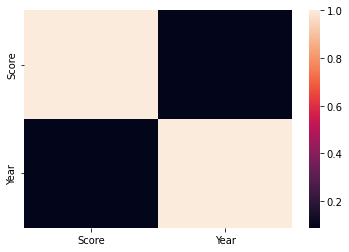

In [68]:
# a corrleation between Year and Score
import seaborn as sns
df_col.corr()
sns.heatmap(df_col.corr())

<AxesSubplot:xlabel='Year', ylabel='Severity'>

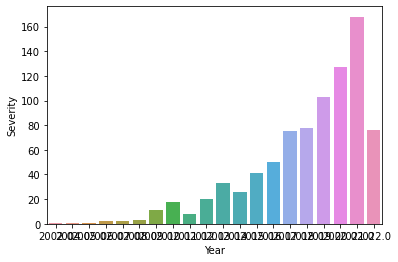

In [88]:
#df_col.groupby("Year").Severity.value_counts()
plut = pd.DataFrame(df_col.groupby("Year").size()).reset_index().sort_values("Year")
import seaborn as sns
plut.columns = ["Year", "Severity"]
sns.barplot(data=plut,x="Year", y = "Severity")


<AxesSubplot:xlabel='Year'>

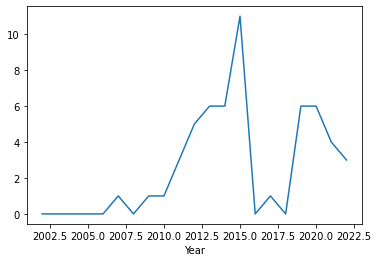

In [94]:
# plotting by Year and Severity
df_col.groupby(["Year","Severity"]).size().unstack().critical.plot()

<AxesSubplot:>

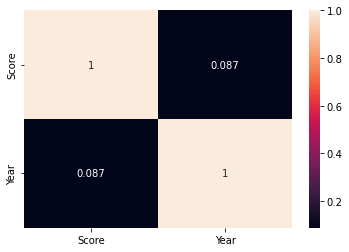

In [95]:
sns.heatmap(df_col.corr(), annot =True)